In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D

In [2]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
# Configuración visual
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10,6)

In [4]:
# 2. Conexión a la base de datos
def connect_db():
    return mysql.connector.connect(
        host="localhost",   
        user="root",        
        password="root",
        database="aerosol_dw"   
    )

In [5]:
# 3. Carga de datos desde la base de datos
def load_table(query):
    conn = connect_db()
    df = pd.read_sql(query, conn)
    conn.close()
    return df

C:\Users\maria\AppData\Local\Temp\ipykernel_24156\1884958656.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


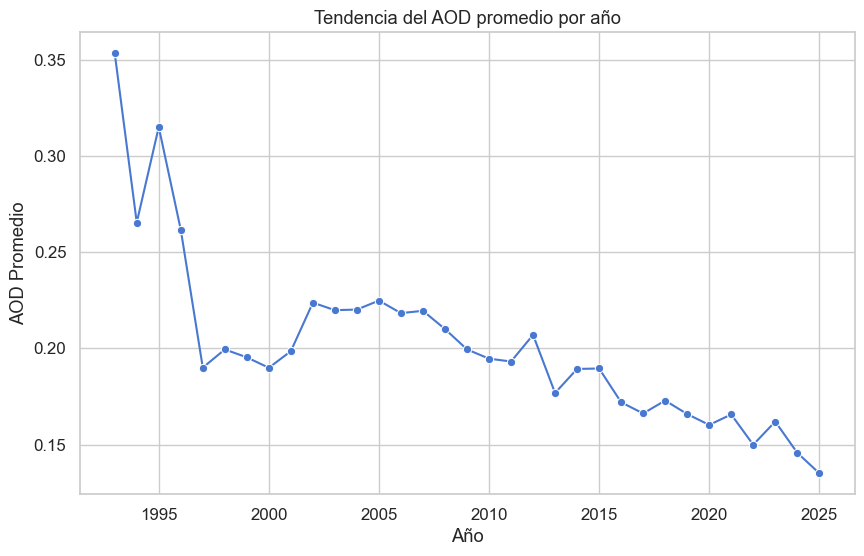

In [6]:
# 1. Promedio de AOD por año
query_aod_year = """
SELECT 
    d.Year,
    AVG(f.AOD_Value) AS Avg_AOD
FROM fact_aod f
JOIN dim_date d ON f.id_date = d.id_date
GROUP BY d.Year
ORDER BY d.Year;
"""
aod_year = load_table(query_aod_year)

sns.lineplot(data=aod_year, x="Year", y="Avg_AOD", marker="o")
plt.title("Tendencia del AOD promedio por año")
plt.xlabel("Año")
plt.ylabel("AOD Promedio")
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_24156\1884958656.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
c:\Users\maria\OneDrive\Documentos\ProyectoETL\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


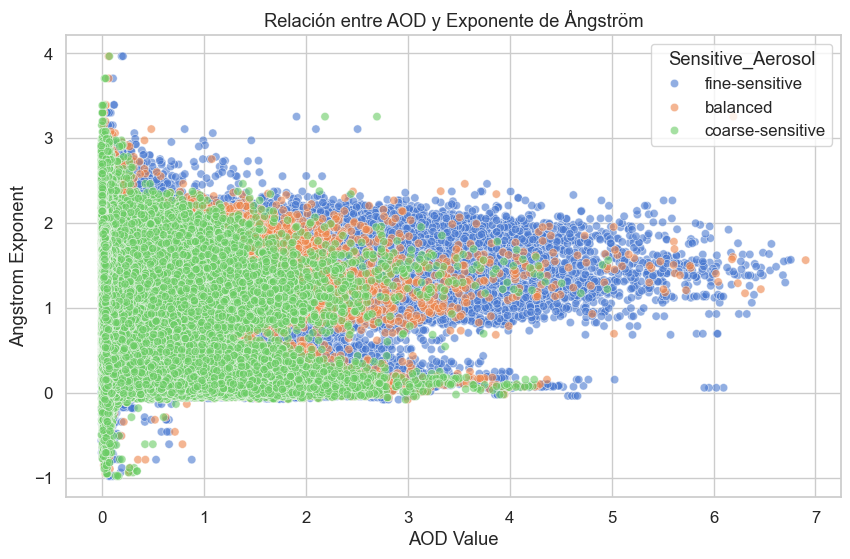

In [7]:
# 2. Relación entre AOD y Angstrom Exponent
query_aod_angstrom = """
SELECT 
    f.AOD_Value,
    f.Angstrom_Exponent,
    w.Sensitive_Aerosol
FROM fact_aod f
JOIN dim_wavelength w ON f.id_wavelength = w.id_wavelength
WHERE f.Angstrom_Exponent IS NOT NULL;
"""
aod_angstrom = load_table(query_aod_angstrom)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=aod_angstrom,
    x="AOD_Value",
    y="Angstrom_Exponent",
    hue="Sensitive_Aerosol",
    alpha=0.6
)
plt.title("Relación entre AOD y Exponente de Ångström")
plt.xlabel("AOD Value")
plt.ylabel("Angstrom Exponent")
plt.show()


C:\Users\maria\AppData\Local\Temp\ipykernel_24156\1884958656.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


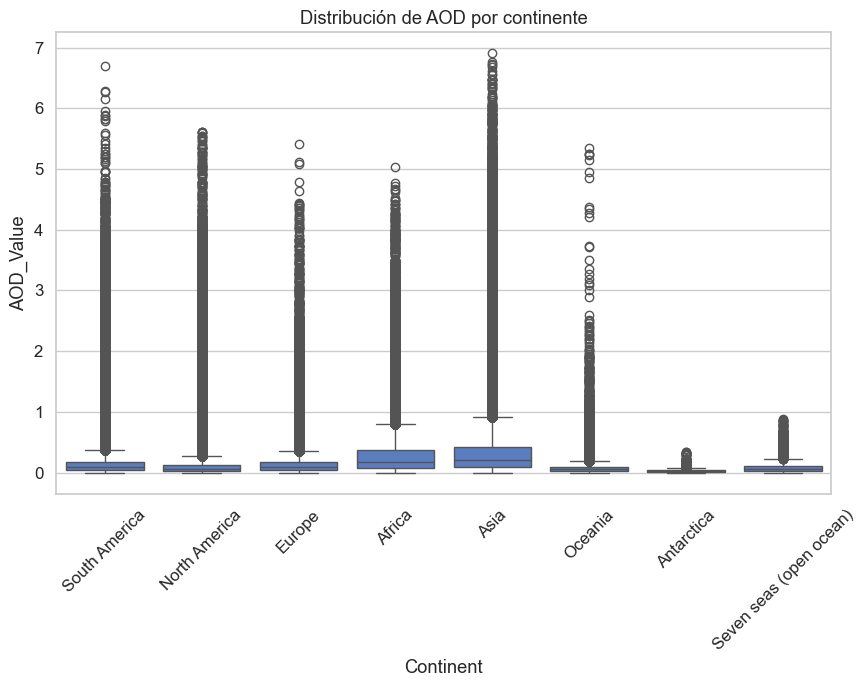

In [8]:
# 3. Distribución de AOD por continente
query_aod_continent = """
SELECT 
    s.Continent,
    f.AOD_Value
FROM fact_aod f
JOIN dim_site s ON f.id_site = s.id_site;
"""
aod_continent = load_table(query_aod_continent)

sns.boxplot(data=aod_continent, x="Continent", y="AOD_Value")
plt.title("Distribución de AOD por continente")
plt.xticks(rotation=45)
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_24156\1884958656.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


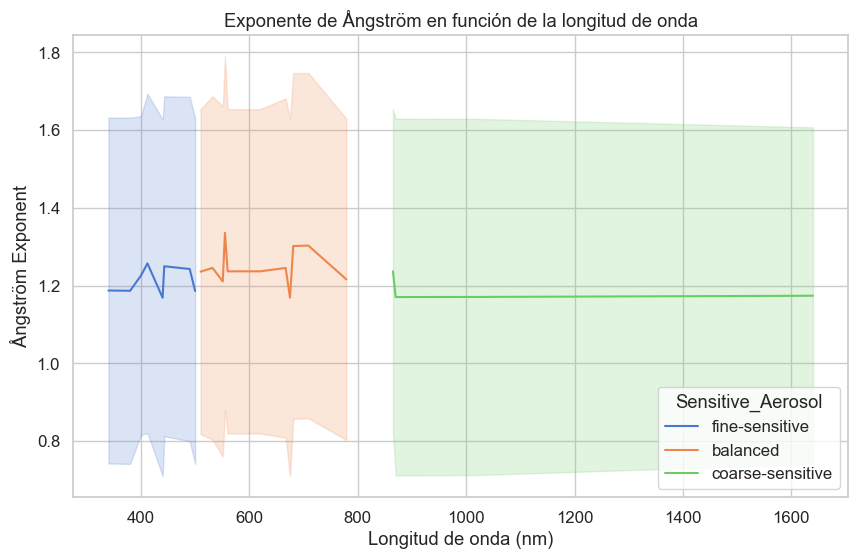

In [9]:
# 4. Ångström Exponent en función de la longitud de onda
query_angstrom_wavelength = """
SELECT 
    w.Wavelength_nm,
    f.Angstrom_Exponent,
    w.Sensitive_Aerosol
FROM fact_aod f
JOIN dim_wavelength w ON f.id_wavelength = w.id_wavelength
WHERE f.Angstrom_Exponent IS NOT NULL;
"""
angstrom_wavelength = load_table(query_angstrom_wavelength)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=angstrom_wavelength,
    x="Wavelength_nm",
    y="Angstrom_Exponent",
    hue="Sensitive_Aerosol",
    estimator="mean",
    errorbar='sd'
)
plt.title("Exponente de Ångström en función de la longitud de onda")
plt.ylabel("Ångström Exponent")
plt.xlabel("Longitud de onda (nm)")
plt.show()